In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [40]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [41]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})

<ipython-input-42-1912326072>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})


In [57]:
X = data[['Spending Score (1-100)','Annual Income (k$)']]

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

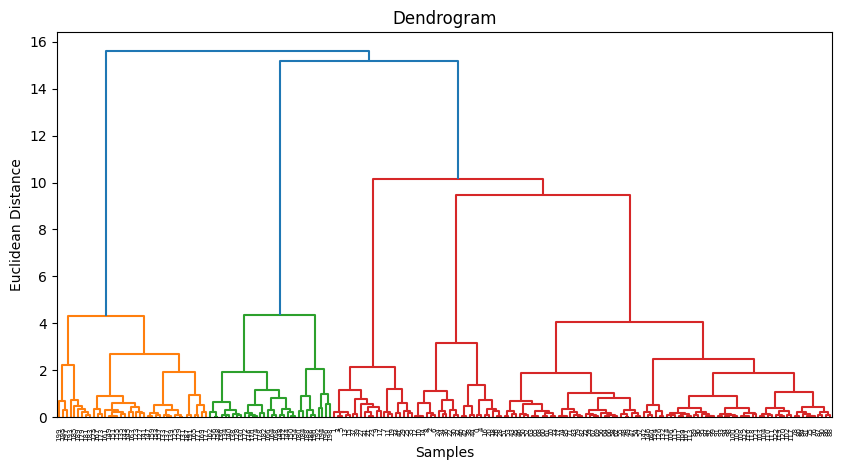

In [59]:
plt.figure(figsize=(10, 5))
linked = linkage(X_scaled, method = 'ward')
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()



In [63]:
clusters = fcluster(linked, 5, criterion='maxclust')
data['Cluster'] = clusters

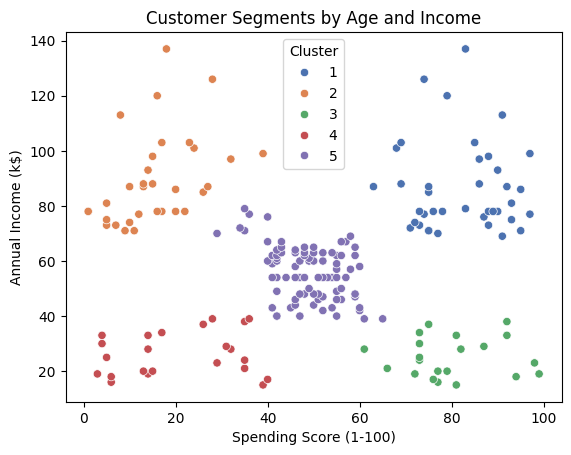

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=data,
    x='Spending Score (1-100)',
    y='Annual Income (k$)',
    hue='Cluster',
    palette='deep'
)
plt.title('Customer Segments by Age and Income')
plt.show()


In [65]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, data['Cluster'])
print(f'Silhouette Score: {score:.2f}')


Silhouette Score: 0.55
